In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
transform  =  transforms.ToTensor()

In [4]:
train_data = datasets.MNIST(root='../Data',train=True,download=True,transform=transform)

In [5]:
test_data = datasets.MNIST(root='../Data',train=False,download=True,transform=transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [8]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [9]:
# Demonstration purpose
# 1- Colour Channel # 2- Number of filters # 3- Size of each filter #4- Stride
conv1 = nn.Conv2d(1,6,3,1)  #  ---->  6 filters  ----> Pooling layer  ---->  Conv2
conv2 = nn.Conv2d(6,16,3,1)

In [10]:
for i, (X_train,y_train) in enumerate(train_data):
    break

In [11]:
X_train.shape # ---> Four dimensions to represent a batch

torch.Size([1, 28, 28])

In [13]:
x = X_train.view(1,1,28,28)

In [14]:
x = F.relu(conv1(x))

In [16]:
x.shape  # Convolution -> Lose information in the border (Since padding is 0) -> Hence 26,26 object
# Padding is not necessary for MNIST data set since all the images are well centered!

torch.Size([1, 6, 26, 26])

In [18]:
# 1- Kernel size, 2- Stride
x = F.max_pool2d(x,2,2)

In [19]:
x.shape # Cutting the size in half (Pooling with 2 Kernels and 2 stride)

torch.Size([1, 6, 13, 13])

In [20]:
x = F.relu(conv2(x))

In [21]:
x.shape

torch.Size([1, 16, 11, 11])

In [22]:
x = F.max_pool2d(x,2,2)

In [23]:
x.shape

torch.Size([1, 16, 5, 5])

In [26]:
x.view(-1,16*5*5).shape

torch.Size([1, 400])

In [4]:
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)

NameError: name 'nn' is not defined

In [3]:
model = ConvolutionalNetwork()
model

NameError: name 'ConvolutionalNetwork' is not defined

In [2]:
x = []
for param in model.parameters():
     x = [x,param.numel()]

NameError: name 'model' is not defined

In [46]:
# Half the parameters and retains the 2d information

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [48]:
import time
start_time = time.time()

# Variables

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Run through all the epochs

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b,(X_train,y_train) in enumerate(train_loader):
        
        b += 1
        
        y_pred = model(X_train)
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%600 == 0:
            print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)


current_time = time.time()
duration = current_time - start_time
print(f'Training duration: {duration/60} min')

Epoch: 0  Batch: 600  Loss: 0.1225944310426712
Epoch: 0  Batch: 1200  Loss: 0.2256750762462616
Epoch: 0  Batch: 1800  Loss: 0.013767155818641186
Epoch: 0  Batch: 2400  Loss: 0.11007468402385712
Epoch: 0  Batch: 3000  Loss: 0.01107978355139494
Epoch: 0  Batch: 3600  Loss: 0.009629492647945881
Epoch: 0  Batch: 4200  Loss: 0.20554237067699432
Epoch: 0  Batch: 4800  Loss: 0.046249620616436005
Epoch: 0  Batch: 5400  Loss: 0.027485638856887817
Epoch: 0  Batch: 6000  Loss: 0.041907843202352524
Epoch: 1  Batch: 600  Loss: 0.011818764731287956
Epoch: 1  Batch: 1200  Loss: 0.04095104709267616
Epoch: 1  Batch: 1800  Loss: 0.0008702435297891498
Epoch: 1  Batch: 2400  Loss: 0.02980102226138115
Epoch: 1  Batch: 3000  Loss: 9.16969365789555e-05
Epoch: 1  Batch: 3600  Loss: 0.0041432990692555904
Epoch: 1  Batch: 4200  Loss: 0.00695433933287859
Epoch: 1  Batch: 4800  Loss: 0.37216001749038696
Epoch: 1  Batch: 5400  Loss: 0.004933515563607216
Epoch: 1  Batch: 6000  Loss: 0.006648652255535126
Epoch: 2  B

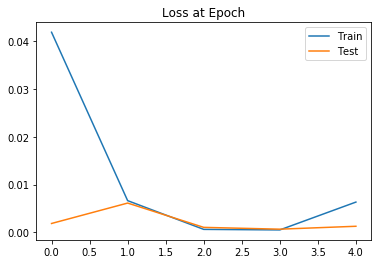

In [50]:
plt.plot(train_losses,label='Train')
plt.plot(test_losses,label='Test')
plt.legend()
plt.title('Loss at Epoch');

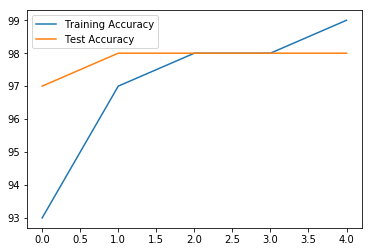

In [51]:
test_acc = [t/100 for t in test_correct]
train_acc = [t/600 for t in train_correct]
plt.plot(train_acc,label='Training Accuracy')
plt.plot(test_acc,label='Test Accuracy')
plt.legend();

In [52]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [54]:
with torch.no_grad():
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted==y_test).sum()

In [55]:
correct.item()/len(test_data)*100

98.31

In [56]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 961,    0,    3,    0,    0,    1,    3,    1,    5,    0],
       [   1, 1130,    2,    0,    0,    0,    5,    3,    0,    0],
       [   0,    1, 1014,    0,    0,    0,    0,    0,    6,    0],
       [   0,    2,    3, 1008,    0,    6,    0,    2,   10,    2],
       [   0,    1,    1,    0,  952,    0,    1,    0,    0,    1],
       [   4,    0,    0,    2,    0,  883,    7,    0,    7,    4],
       [  11,    0,    1,    0,    0,    1,  941,    0,    0,    0],
       [   0,    0,    8,    0,    0,    0,    0, 1007,    2,    3],
       [   2,    0,    0,    0,    0,    0,    0,    1,  937,    1],
       [   1,    1,    0,    0,   30,    1,    1,   14,    7,  998]],
      dtype=int64)